# Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import manipulation_functions as mf

# Load the CSV file
file_path = 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\1_data_cleaning\\data_cleaned.csv'
df_manipulation = pd.read_csv(file_path)

In [2]:
df_manipulation

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
# Step 2: Calculate 'total_purchase' and identify outliers
df_manipulation['total_purchase'] = df_manipulation['quantity'] * df_manipulation['unitprice']

In [4]:
# Identify outliers in 'total_purchase'
outliers = mf.identify_outliers(df_manipulation, 'total_purchase')
print(f"Number of outliers identified: {len(outliers)}")

Number of outliers identified: 44997


## Visualization Outliers

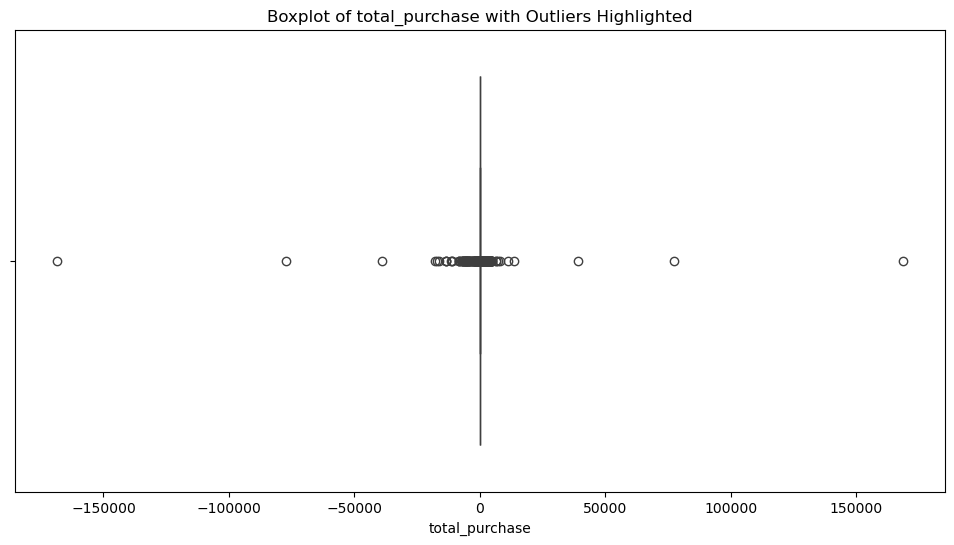

In [5]:
mf.visualize_outliers(df_manipulation, 'total_purchase')

## Cap Outliers

Given the objectives of understanding popular products, seasonal trends, and purchase frequency:

Capping outliers is a better approach. It allows to mitigate the impact of extreme values without losing potentially valuable insights from bulk purchases or high-value customers.

In [6]:
# Step 3: Cap Outliers
df_manipulation = mf.cap_outliers(df_manipulation, 'total_purchase')

## Type Casting

Ensuring that invoicedate is in datetime format and that quantity and unitprice are stored as floats.

In [7]:
df_manipulation = mf.type_casting(df_manipulation)
print("Type casting completed.")

Type casting completed.


## Feature Selection

- Purchase Behavior: customerid, description, and total_purchase allow you to analyze purchase frequency and customer spending, which are critical for understanding customer behavior.

- Product Popularity: description, quantity, and total_purchase help identify which products are most popular, providing insights into demand trends.

- Seasonal Trends: invoicedate is key for analyzing when products are most popular and how sales fluctuate throughout the year.

- Revenue Analysis: unitprice and total_purchase allow for in-depth revenue analysis, helping you understand which products contribute most to the bottom line.

- Geographical Insights: If country is available, it can add a layer of geographical analysis to understand regional preferences.

In [8]:
df_selected = mf.select_features(df_manipulation)
print("Selected features for analysis.")

Selected features for analysis.


## One-Hot Encoding

In [9]:
df_manipulation = mf.one_hot_encode(df_manipulation)
print("One-hot encoding completed.")

One-hot encoding completed.


## Data Features

In [10]:
df_manipulation = mf.extract_date_features(df_manipulation)
print("Date features extracted.")

Date features extracted.


- Adding the new data features into the features already picked

In [11]:
df_selected = mf.select_features(df_manipulation)
print("Selected features for analysis.")

Selected features for analysis.


## Correlation Analysis

A correlation analysis it helps to understand how numerical features (like quantity, unitprice, total_purchase, and time-related features) are correlated

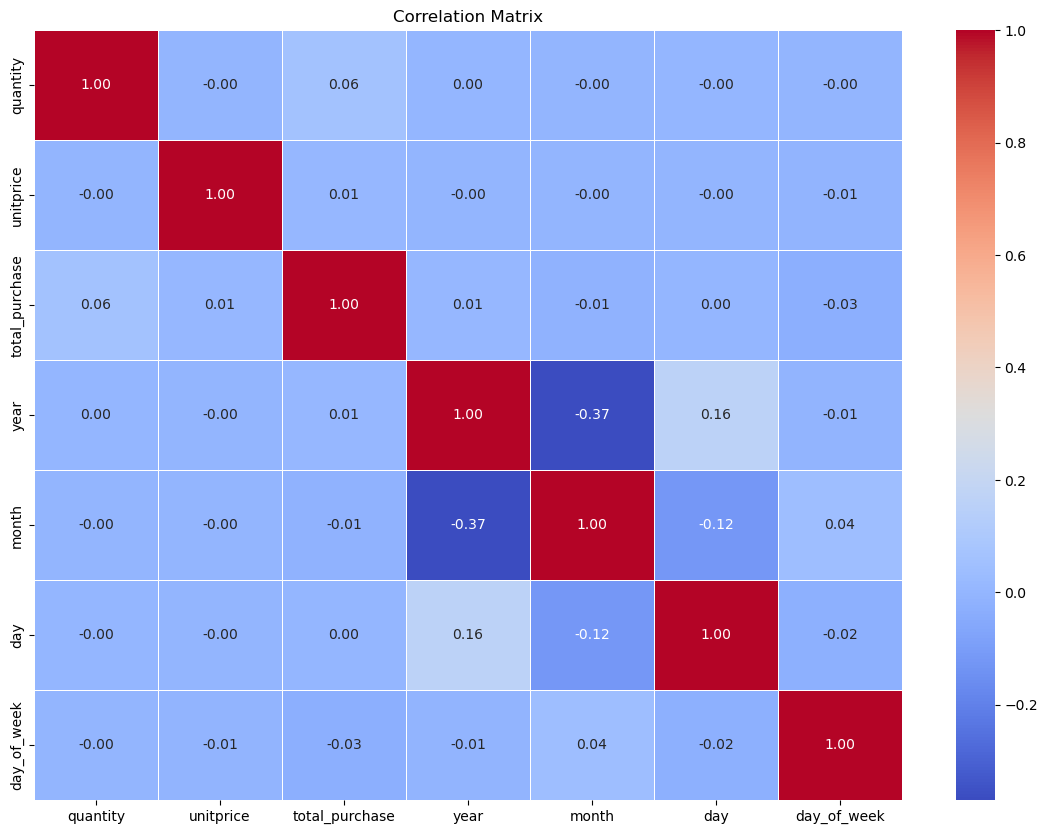

In [12]:
correlation_matrix = mf.correlation_analysis(df_manipulation)

## Group Analysis

Analyzing how different customer segments (e.g., based on purchase frequency) behave in terms of total_purchase.

total_purchase helps you understand the spending behavior of customers across different segments. It shows how much each segment spends per transaction, which is crucial for optimizing inventory and tailoring marketing efforts.

In [13]:
df_manipulation['purchase_frequency_segment'] = pd.cut(
    df_manipulation['quantity'], bins=[0, 2, 5, 10, df_manipulation['quantity'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)

c:\Users\USER\Documents\GitHub\project_final\3_data_manipulation\manipulation_functions.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df_manipulation.groupby(group_by_column)[analysis_column].describe()


Group-wise analysis of total_purchase by purchase_frequency_segment:
                               count       mean        std   min    25%  \
purchase_frequency_segment                                                
Low                         230056.0   6.069419   6.357681 -17.6   1.95   
Medium                       87362.0  12.133543   8.909796   0.0   5.00   
High                         81236.0  17.078693   9.076525   0.0  10.00   
Very High                   132631.0  21.863912  11.880141   0.0  10.50   

                              50%    75%   max  
purchase_frequency_segment                      
Low                          3.90   7.95  38.4  
Medium                      10.08  16.52  38.4  
High                        16.50  20.80  38.4  
Very High                   19.80  37.44  38.4  


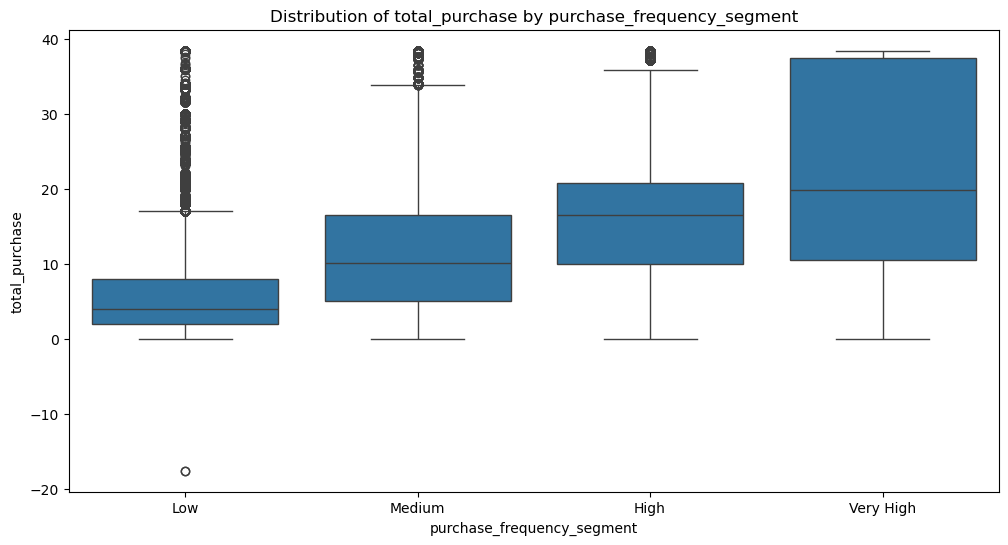

In [14]:
# Group analysis by the purchase frequency segment on 'total_purchase'
group_data = mf.group_analysis(df_manipulation, 'purchase_frequency_segment', 'total_purchase')

- High-Value Customers:

    Customers in the "Very High" frequency segment are responsible for the highest average and median purchases. They are likely your most valuable customers, and understanding their behavior could be key to optimizing inventory for high-demand products.

- Segment Differentiation:

    The "Low" and "Medium" frequency segments have significantly lower total purchases, indicating they might be occasional shoppers or less engaged. These segments might benefit from targeted promotions or loyalty programs to increase their spending.

- Inventory Insights:

    Based on the high variability in spending within the "High" and "Very High" segments, you might need to ensure that inventory is sufficiently stocked with a variety of products catering to these customers, who likely have diverse purchasing habits.    

## Saving Manipulated Data

In [15]:
mf.save_manipulated_data(df_selected, 'C:\\Users\\USER\\Documents\\GitHub\\project_final\\3_data_manipulation\\data_manipulated.csv')

Data manipulation completed and saved to C:\Users\USER\Documents\GitHub\project_final\3_data_manipulation\data_manipulated.csv.
